In [134]:
import numpy as np  
import pandas as pd 
data_x=pd.read_csv('../input/loan-prediction-hackathon/train_ctrUa4K.csv')
test_data=pd.read_csv('../input/loan-prediction-hackathon/test_lAUu6dG.csv')
data_y=data_x['Loan_Status']

In [135]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
impute=SimpleImputer(strategy='most_frequent')
label=LabelEncoder()

In [136]:
data_x.drop('Loan_Status',axis=1,inplace=True)
from sklearn.model_selection import train_test_split
x_train,x_valid,yt,yv=train_test_split(data_x,data_y,test_size=0.3,random_state=2)

In [137]:
y_train=[]
y_valid=[]
for i in range(0,yt.shape[0]):
    if yt.iloc[i]=='N':
        y_train.append(0)
    else:
        y_train.append(1)
for i in range(0,yv.shape[0]):
    if yv.iloc[i]=='N':
        y_valid.append(0)
    else:
        y_valid.append(1)
y_train=pd.DataFrame({'Loan_Status':y_train})
y_valid=pd.DataFrame({'Loan_Status':y_valid})

In [138]:
cat_col=['Gender','Married','Dependents','Self_Employed','Loan_ID','Education','Property_Area']
simp_null=['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']

In [139]:
train_temp1=pd.DataFrame(impute.fit_transform(x_train))
valid_temp1=pd.DataFrame(impute.fit_transform(x_valid))
train_temp1.columns=x_train.columns
valid_temp1.columns=x_valid.columns

In [140]:
for col in cat_col:
    train_temp1[col]=pd.DataFrame(label.fit_transform(train_temp1[col]))
    valid_temp1[col]=pd.DataFrame(label.fit_transform(valid_temp1[col]))
x_train=train_temp1.copy()
x_valid=valid_temp1.copy()
x_train[simp_null]=train_temp1[simp_null].astype(int)
x_valid[simp_null]=valid_temp1[simp_null].astype(int)

In [141]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
xt= pd.DataFrame(min_max_scaler.fit_transform(x_train))
xv= pd.DataFrame(min_max_scaler.fit_transform(x_valid))
yt= pd.DataFrame(min_max_scaler.fit_transform(y_train)).values
yv= pd.DataFrame(min_max_scaler.fit_transform(y_valid)).values
yt=yt.ravel()
yv=yv.ravel()

In [142]:
x_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

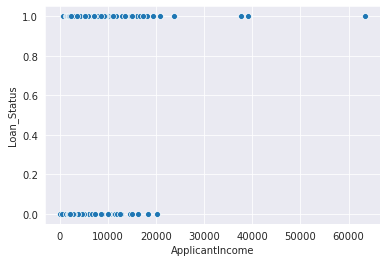

In [143]:
import seaborn as sns
sns.scatterplot(x=x_train['ApplicantIncome'],y=y_train['Loan_Status'])

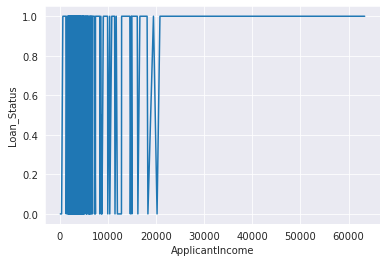

In [144]:
sns.set_style("darkgrid")
sns.lineplot(x=x_train['ApplicantIncome'],y=y_train['Loan_Status'])

In [145]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=0)
model.fit(xt,yt)
pred=model.predict(xv)
prediction=[]
for i in range(0,pred.shape[0]):
    if pred[i]>=0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [146]:
from sklearn.svm import SVR
model1=SVR(kernel='linear')
model1.fit(xt,yt)
pred1=model1.predict(xv)
prediction1=[]
for i in range(0,pred1.shape[0]):
    if pred1[i]>=0.5:
        prediction1.append(1)
    else:
        prediction1.append(0)

In [147]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(max_iter=500)
model2.fit(xt,yt)
prediction2=model2.predict(xv)

In [148]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,yv))
print(accuracy_score(prediction1,yv))
print(accuracy_score(prediction2,yv))

0.772972972972973
0.8
0.8


In [149]:
#based on the accuracy of three model, SVM and Logistic regression gives the same result.
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(yv,prediction1)
confusion_matrix2= confusion_matrix(yv,prediction2)
print(confusion_matrix1,confusion_matrix2)


[[ 23  35]
 [  2 125]] [[ 23  35]
 [  2 125]]


In [150]:
test_temp1=pd.DataFrame(impute.fit_transform(test_data))
test_temp1.columns=test_data.columns
for col in cat_col:
    test_temp1[col]=pd.DataFrame(label.fit_transform(test_temp1[col]))
x_test=test_temp1.copy()
x_test[simp_null]=test_temp1[simp_null].astype(int)

In [158]:
final=model2.predict(x_test).astype(int)
predict=[]
for i in range(0,final.shape[0]):
    if final[i]==1:
        predict.append('Y')
    else:
        predict.append('N')

In [168]:
loan_id=test_data.iloc[:,0].tolist()

In [172]:
my_solution= pd.DataFrame({"Loan_ID":loan_id,"Loan_Status":predict},index=None)
print(my_solution)

      Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           N
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           N
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]


In [173]:
my_solution.to_csv("loan_prediction.csv",index=False)